This notebook gives a numerical soultion to describe how the electron concentration changes with postion *$x$* and time *$t$* inside a pervoskite solar cell.<br>Here we consider trapping of electrons by positively charged donors *($k_{1}$)*, electron-hole recombination *($k_{2}$)*, as well as diffusion *($D$)*.<br>Basically, at x = 0 (do not consider diffusion): $$\frac{dn}{dt} = -k_{1}N_{d}n-k_{2}n^{2} \tag{1}$$<br>However, if we consider electrons can ***diffuse*** along the sample, then at certain position *(x > 0)*, there are electrons that diffuse into, meanwhile be trapped and recombine.Fick's first law gives a quantitative description of this process:$$J = -D\frac{\partial n}{\partial x} \tag{2}$$ Here, $J$ is the **diffusion flux**, which measures the amount of substance that will flow through a *unit* area during a *unit* time interval.<br>Also, Fick's second law gives how concentration $n$ changes with time $t$:$$\frac{\partial n}{\partial t} = D\frac{\partial^{2}n}{\partial x^{2}} \tag{3}$$ Combine equation $(1)$ and equation $(3)$ we can get:$$\frac{\partial n}{\partial t} = D\frac{\partial^{2}n}{\partial x^{2}}-k_{1}N_{d}n-k_{2}n^{2} \tag{4}$$ However, equation $(4)$ *cannot* be easily solved numerically.<br>
Therefore, here I use infinitesimal method on a two-dimensional (2D) plane (*i.e.* $x-t$ plane) to numerically calculate the electron concentration at every point in the plane (*i.e.* every $x$ and every $t$).

In [100]:
import numpy as np
import pandas as pd
from pandas import DataFrame
#define the constants
D = 30                #μm²/μs
k1 = 10**(-5)         #μm³/μs
k2 = 2*10**(-5)       #μm³/μs
Nd = 5*10**4          #/μm³
n0 = 10**5            #/μm³
dx = 1                #μm
dt = 10**(-3)         #μs

In [9]:
#2000 steps for both x and t, total x = 2000μm, total t = 2μs

#list of lists to store the coordinates of the 2D x-t plane; data in one sublist has the same t
result = [[] for i in range(2000)]

#create the initial concentration
initial = [n0]
for i in range(1999):
    initial.append(0)
result[0] = initial

In [10]:
#decrease of electron due to trapped by donors and PL
def trap_and_PL(n):
    n_change = (-k1*Nd*n-k2*n**2)*dt
    return n_change

#change of electron due to diffusion, return a postive value (n1 > n2)
def diff(n1, n2):
    n_change = D*(n1-n2)*dt/(dx**2)
    return n_change

In [71]:
#define a function to calculate the concentration of every postion at a certain time, based on the calculation
#results of the last time point
def n_line(i):
    line = []
    for j in range(i+1):
        if j == 0:
            n = result[i-1][j]+trap_and_PL(result[i-1][j])-diff(result[i-1][j], result[i-1][j+1])
            line.append(n)
        elif j < i:
            n = result[i-1][j]+trap_and_PL(result[i-1][j])-diff(result[i-1][j], result[i-1][j+1])+diff(result[i-1][j-1], result[i-1][j])
            line.append(n)
        else:
            n = result[i-1][j]+trap_and_PL(result[i-1][j])+diff(result[i-1][j-1], result[i-1][j])
            line.append(n)
    for k in range(1999-i):
            line.append(0)
    result[i] = line   #store the list 'line' to the list 'result'

In [72]:
#perform the calculation line by line, from t = 0 to t = 2μs
for i in range(2000):
    if i > 0:
        n_line(i)

In [74]:
#store the result to a pandas dataframe
df = DataFrame(result)
#show the first 5 rows of the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,100000.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96750.000000,3000.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93701.913750,5720.820000,90.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90840.029008,8187.813247,256.179438,2.700000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88150.004303,10423.995993,486.394667,10.222033,0.081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Having a close look at the result, I find that even at t = 2μs, the concentration at 100μm is very close to 0 (at a magnitude 10 to -15). So only the first 100 columns of the dataframe are useful and I pick them out to a new dataframe
df_new for a better data visualization.

In [77]:
#create a new dataframe df_new, using the first 100 columns of df
df_new = df.iloc[0:2000, 0:100]
#show the first 5 rows of df_new
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100000.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96750.000000,3000.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93701.913750,5720.820000,90.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90840.029008,8187.813247,256.179438,2.700000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88150.004303,10423.995993,486.394667,10.222033,0.081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


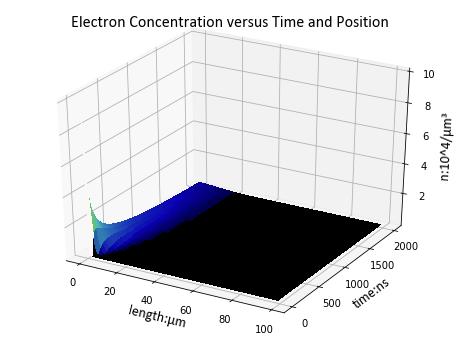

In [103]:
#3D plot for the concentration profile
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

x,y = np.meshgrid(df_new.columns, df_new.index)
z = df_new.values/(10**4)     #set the unit of concentration to 10^4/μm³

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
rgb = LightSource(270, 45).shade(z, cmap=plt.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

my_y_ticks = [0,500,1000,1500,2000]   #ticks for time (ns)
my_z_ticks = [2,4,6,8,10]             #ticks for concentration (10^4/μm³)

ax.set_xlabel('length:μm', fontsize = 14, fontname = 'Calibri')
ax.set_ylabel('time:ns', fontsize = 14, fontname = 'Calibri')
ax.set_zlabel('n:10^4/μm³', fontsize = 14, fontname = 'Calibri')
ax.set_title('Electron Concentration versus Time and Position', fontsize = 16, fontname = 'Calibri')
ax.set_yticks(my_y_ticks)
ax.set_zticks(my_z_ticks)

plt.show()

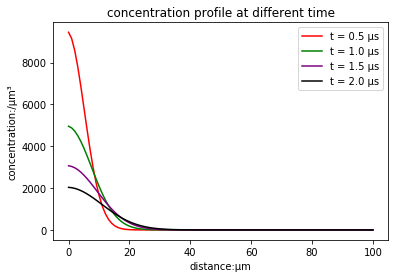

In [116]:
#2D plot for the concentration profile at certain time (t = 0.5μs, t = 1 μs, t = 1.5 μs, t = 2 μs)
fig = plt.figure(figsize=(6,4))

x = np.linspace(0, 100, 100)
y1 = result[500][0:100]
y2 = result[1000][0:100]
y3 = result[1500][0:100]
y4 = result[1999][0:100]

plt.plot(x, y1, c = 'red')
plt.plot(x, y2, c = 'green')
plt.plot(x, y3, c = 'purple')
plt.plot(x, y4, c = 'black')

plt.xlabel('distance:μm')
plt.ylabel('concentration:/μm³')
plt.title('concentration profile at different time')
plt.legend(['t = 0.5 μs', 't = 1.0 μs', 't = 1.5 μs', 't = 2.0 μs'])
plt.show()

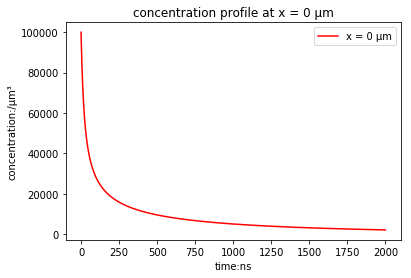

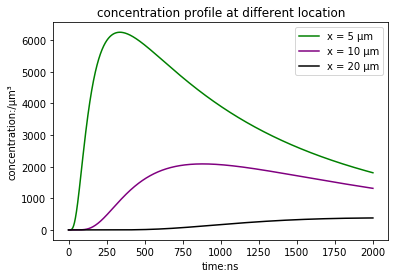

In [121]:
#2D plot for the concentration profile at certain location (x = 0 μm, t = 5 μm, t = 10 μm, t = 20 μm)
fig = plt.figure(figsize=(6,4))

x = np.linspace(0, 2000, 2000)
y1 = df.iloc[: , 0:1].to_numpy()
y2 = df.iloc[: , 5:6].to_numpy()
y3 = df.iloc[: , 10:11].to_numpy()
y4 = df.iloc[: , 20:21].to_numpy()

plt.plot(x, y1, c = 'red')
plt.legend(['x = 0 μm'])
plt.xlabel('time:ns')
plt.ylabel('concentration:/μm³')
plt.title('concentration profile at x = 0 μm')
plt.show()

plt.plot(x, y2, c = 'green')
plt.plot(x, y3, c = 'purple')
plt.plot(x, y4, c = 'black')

plt.xlabel('time:ns')
plt.ylabel('concentration:/μm³')
plt.title('concentration profile at different location')
plt.legend(['x = 5 μm', 'x = 10 μm', 'x = 20 μm'])
plt.show()

In [104]:
#save the results to csv files
df.to_csv('diffusion_result_2mm_2μs')
df_new.to_csv('diffusion_result_100μm_2μs')